# Estadistica Aplicada
## Edwin Javier Hernandez Rodriguez 2034203
### SESION 12 ----- 07 MARZO 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [4]:
relacion

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1
5,0,4,1
6,0,4,1
7,0,5,1
8,0,5,1
9,0,8,1


t:      variable de tiempo medido en semanas

evento: terminar la relacion 

tratamiento: 0 personas no detallistas 1 personas que les pedimos se detallistas

(queremos medir si el tiempo de relacion fluye en torno a si son o no detallistas) => ¿Ser detallista hace que la relacion dure mas?

*HIPOTESIS:* Ser detallista hace que la relacion dure mas

In [13]:
relacion.groupby('tratamiento').describe()

t                                                  estado  \
            count       mean       std  min  25%   50%   75%   max  count   
tratamiento                                                                 
0            21.0   8.666667  6.467869  1.0  4.0   8.0  12.0  23.0   21.0   
1            21.0  17.095238  9.999524  6.0  9.0  16.0  23.0  35.0   21.0   

                                                          
                 mean       std  min  25%  50%  75%  max  
tratamiento                                               
0            1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
1            0.428571  0.507093  0.0  0.0  0.0  1.0  1.0

En promedio la relacion de los detallistas duro XX semanas y la relacion de los no detallistas duro YY semanas

In [6]:
from lifelines import KaplanMeierFitter

In [9]:
detallistas = relacion.query('tratamiento==1')
no_detallistas = relacion.query('tratamiento==0')

In [12]:
kmf_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])  #variable tiempo y luego evento
kmf_nd = KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

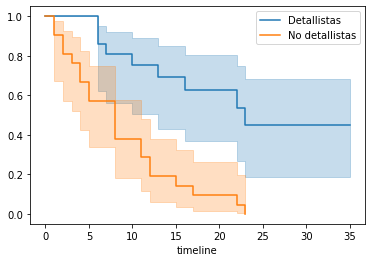

In [15]:
kmf_d.plot_survival_function(label='Detallistas')
kmf_nd.plot_survival_function(label='No detallistas')
plt.show()

* en promedio dura mas la relacion de los detallistas
* si se empalman da a entender que en ese punto suelen tener el mismo valor, ser iguales.

Ahora vamos a verificar esa parte en donde se empalman

In [16]:
from lifelines.statistics import logrank_test

In [18]:
lrt1 = logrank_test(detallistas['t'], detallistas['estado'], no_detallistas['t'], no_detallistas['estado'])
lrt1.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.45 <0.005     33.68

In [ ]:
El valor es menor a 0.005

In [20]:
f'{lrt1.p_value: .20f}'

' 0.00000000007241754749'

Ho funciones de superviviencia identicas
Ha funciones de supervivencia son diferentes

Se rechaza Ho entonces las funciones de supervivencia de detallistas y no detallistas son distintas de acuerdo con el long_rank test

Ya sabemos que duran mas, pero no sabemos que tanto mas. Eso lo sabremos con el modelo de COX

* MODELO DE COX *

In [21]:
from lifelines import CoxPHFitter

In [23]:
cph = CoxPHFitter()
cph.fit(relacion, 't','estado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'estado'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-07 21:47:43 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
tratamiento  -1.57       0.21       0.41            -2.38            -0.76                 0.09                 0.47

              cmp to     z      p   -log2(p)
covariate                                   
tratamiento     0.00 -3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

1 detallista
0 no detallista

entonces ser detallista disminuye el riesgo de que la relacion termine, eso da el signo de coeficiente

Cuanto disminuye? eso lo vemos con exp(coef), si es positivo entonces se le resta 1-0.21 => Ser detallista disminuye el riesgo de que termine la relacion un 79% en promedio en comparacion con los no detallistas

# Entonces, en conclusion los datos si cumplen la hipotesis #

El profe espera que en la tarea de python quiere que comentemos la hipotesis al inicio y al final decir si se confirma o no